In [1]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

//anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# IMPORT DATA

df = pd.read_csv('brent_daily_price.csv',sep=';')
df.head()

,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
0,"mag 20, 1987","18,63"
1,"mag 21, 1987","18,45"
2,"mag 22, 1987","18,55"
3,"mag 25, 1987","18,6"
4,"mag 26, 1987","18,63"


In [3]:
# CLEAN DATA

italian_to_english_months = {
    'gen': 'Jan', 'feb': 'Feb', 'mar': 'Mar', 'apr': 'Apr', 'mag': 'May',
    'giu': 'Jun', 'lug': 'Jul', 'ago': 'Aug', 'set': 'Sep', 'ott': 'Oct', 
    'nov': 'Nov', 'dic': 'Dec'
}

df['Date'] = df['Date'].astype(str).apply(lambda x: ' '.join([italian_to_english_months.get(word, word) for word in x.split()]))

df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')
df['Date'] = df['Date'].dt.strftime('%d-%b-%y')

df['Price'] = df['Europe Brent Spot Price FOB (Dollars per Barrel)'].str.replace(',', '.').astype(float)

df = df[['Date', 'Price']]

df = df.dropna()

df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
//anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
//anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a 

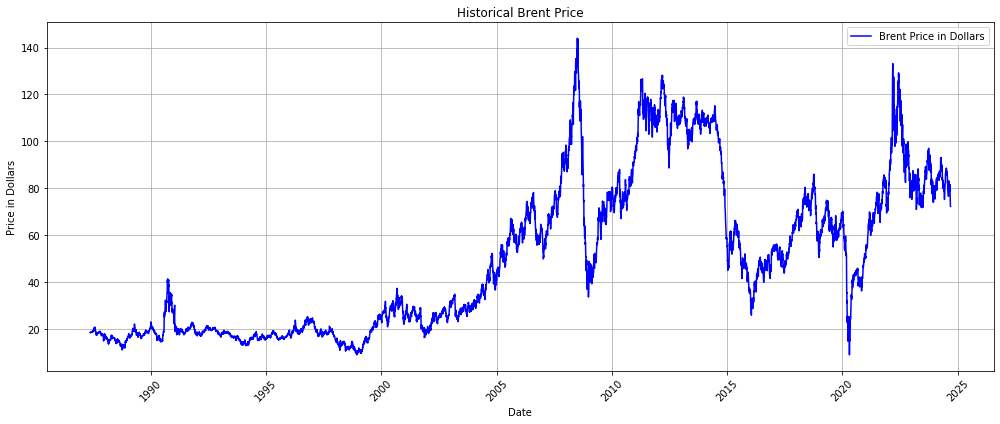

In [4]:
# PLOT DATA

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values(by='Date')

plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Price'], label='Brent Price in Dollars', color='b')
plt.xlabel('Date')
plt.ylabel('Price in Dollars')
plt.title('Historical Brent Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



In [5]:
m = Prophet()

pro_df = df
pro_df.columns = ['ds', 'y']

m.fit(pro_df)
future = m.make_future_dataframe(periods = 120)
forecast = m.predict(future)

forecast.head()

17:51:51 - cmdstanpy - INFO - Chain [1] start processing
17:51:56 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1987-05-20,16.358622,2.937524,31.980180,16.358622,16.358622,0.680884,0.680884,0.680884,-0.470466,-0.470466,-0.470466,1.151351,1.151351,1.151351,0.0,0.0,0.0,17.039506
1,1987-05-21,16.362193,2.199133,30.588681,16.362193,16.362193,0.823484,0.823484,0.823484,-0.354608,-0.354608,-0.354608,1.178092,1.178092,1.178092,0.0,0.0,0.0,17.185678
2,1987-05-22,16.365765,2.692556,31.704091,16.365765,16.365765,0.812642,0.812642,0.812642,-0.386545,-0.386545,-0.386545,1.199187,1.199187,1.199187,0.0,0.0,0.0,17.178407
3,1987-05-25,16.376479,2.881835,31.870929,16.376479,16.376479,0.860655,0.860655,0.860655,-0.368041,-0.368041,-0.368041,1.228695,1.228695,1.228695,0.0,0.0,0.0,17.237134
4,1987-05-26,16.380051,3.523005,30.121416,16.380051,16.380051,0.747016,0.747016,0.747016,-0.480916,-0.480916,-0.480916,1.227932,1.227932,1.227932,0.0,0.0,0.0,17.127067


//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
//anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
//anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a 

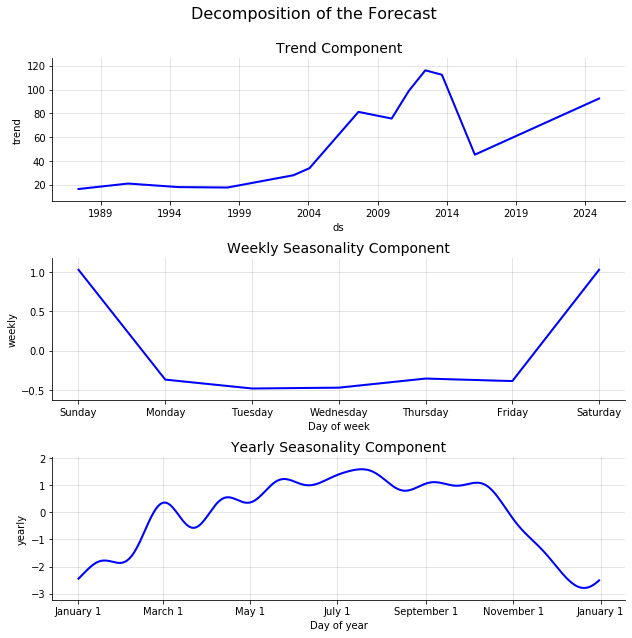

In [6]:
# PLOT COMPONENT

fig2 = m.plot_components(forecast)


axes = fig2.get_axes()

axes[0].set_title('Trend Component', fontsize=14)
axes[1].set_title('Weekly Seasonality Component', fontsize=14)
axes[2].set_title('Yearly Seasonality Component', fontsize=14)

fig2.subplots_adjust(top=0.9, hspace=0.4)

for ax in axes:
    ax.grid(True)  
    ax.spines['top'].set_visible(False)  
    ax.spines['right'].set_visible(False) 
    ax.margins(x=0.05, y=0.1)  

    for line in ax.get_lines():
        line.set_color('blue')  
        line.set_linewidth(2)  

fig2.suptitle('Decomposition of the Forecast', fontsize=16)

plt.show()


In [7]:
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(pro_df.set_index('ds'))
cmp_df.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
1987-05-20,17.039506,2.937524,31.980180,18.63
1987-05-21,17.185678,2.199133,30.588681,18.45
1987-05-22,17.178407,2.692556,31.704091,18.55
1987-05-25,17.237134,2.881835,31.870929,18.60
1987-05-26,17.127067,3.523005,30.121416,18.63


//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
//anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
//anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a 

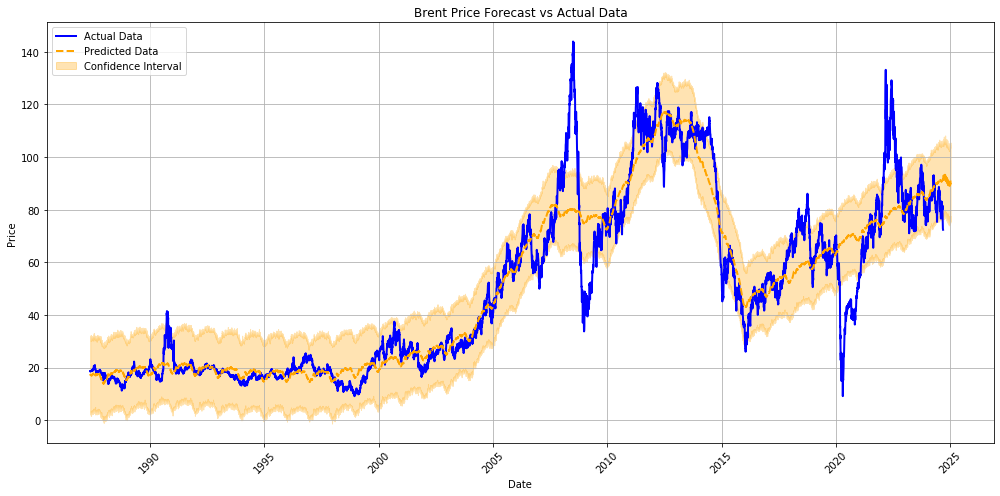

In [8]:
# PLOT ACTUAL DATA VS PREDICTED DATA

plt.figure(figsize=(14, 7))

plt.plot(cmp_df.index, cmp_df['y'], label='Actual Data', color='blue', linestyle='-', linewidth=2)

plt.plot(cmp_df.index, cmp_df['yhat'], label='Predicted Data', color='orange', linestyle='--', linewidth=2)

plt.fill_between(cmp_df.index, cmp_df['yhat_lower'], cmp_df['yhat_upper'], color='orange', alpha=0.3, label='Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Brent Price Forecast vs Actual Data')

plt.legend()

plt.grid(True) 
plt.xticks(rotation=45)  
plt.tight_layout()  

plt.show()
